<a href="https://colab.research.google.com/github/moriartyjm/optimalswitching/blob/main/hydro/Hydropower_example_ent_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on t=9
Epoch 1/20
1563/1563 [==============================] - 26s 8ms/step - loss: -151.0908
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: -154.0545
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: -155.2254
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: -155.9979
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: -156.2391
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: -156.2887
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: -156.2997
Epoch 8/20
1563/1563 [==============================] - 13s 8ms/step - loss: -156.3332
Epoch 9/20
1563/1563 [==============================] - 12s 8ms/step - loss: -156.3413
Epoch 10/20
1563/1563 [==============================] - 12s 8ms/step - loss: -156.3304
Epoch 11/20
1563/1563 [==============================] - 12s 8ms/step - loss: -156.3478
Epoch 12/20
1563/1563 [===

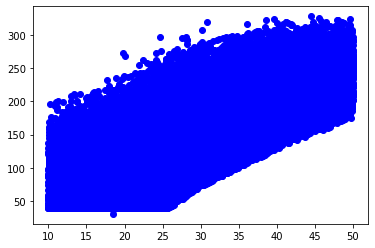

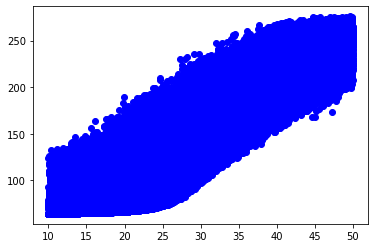

Epoch 1/20
1563/1563 [==============================] - 26s 8ms/step - loss: -133.7471
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: -133.7779
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: -133.7216
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: -133.7650
Day 9 finished with average reward 133.07 for theta=0.01
Epoch 1/80
1563/1563 [==============================] - 3s 1ms/step - loss: 0.0103
Epoch 2/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0077
Epoch 3/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0076
Epoch 4/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0075
Epoch 5/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0075
Epoch 6/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0075
Epoch 7/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0074
Epoch 8/80
156

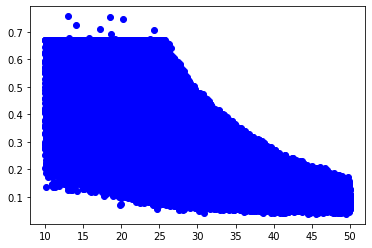

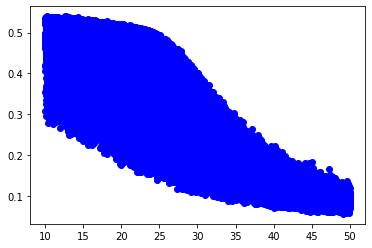

Epoch 1/20
1563/1563 [==============================] - 26s 8ms/step - loss: -116.0277
Epoch 2/20
1563/1563 [==============================] - 13s 9ms/step - loss: -116.0956
Epoch 3/20
1563/1563 [==============================] - 13s 9ms/step - loss: -115.9947
Epoch 4/20
1563/1563 [==============================] - 13s 9ms/step - loss: -116.0920
Day 9 finished with average reward 114.92 for theta=0.02
Epoch 1/80
1563/1563 [==============================] - 3s 1ms/step - loss: 0.0114
Epoch 2/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0052
Epoch 3/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0049
Epoch 4/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0048
Epoch 5/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0048
Epoch 6/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0047
Epoch 7/80
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0047
Epoch 8/80
156

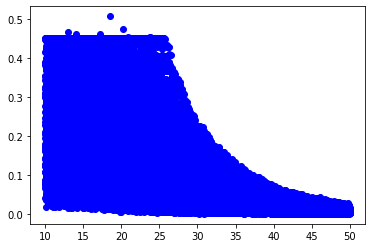

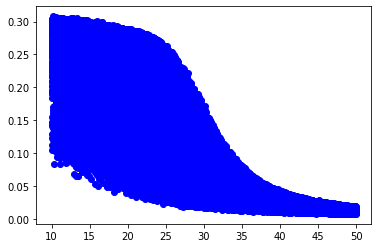

Working on t=8
Epoch 1/20
1563/1563 [==============================] - 27s 9ms/step - loss: -193.8877
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9066
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9113
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9172
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9200
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9279
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9264
Epoch 8/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9359
Epoch 9/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9359
Epoch 10/20
1563/1563 [==============================] - 14s 9ms/step - loss: -193.9261
Day 8 finished with average reward 193.98 for theta=0.0
Epoch 1/80
1563/1563 [==============================] - 3s

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 11 15:18:09 2021

@author: Magnus Perninge
"""


# Generate trajectories of R_t and H_t
# dZ_t=-a_1Z_tdt+a_2 abs(m(t)+Z_t)dW_t, V_t=abs(m(t)+V_t)
# dR_t=c_1R_tdt +c_2R_tdW_t


import time
import numpy as np
from scipy.linalg import expm, eig
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Math, HTML

import random
import tensorflow as tf
from tensorflow.python.keras import backend as K

from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.models import Model

import os

# Set a seed value
seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)

tf.compat.v1.enable_eager_execution() 

early_stopping_bids = tf.keras.callbacks.EarlyStopping(monitor='loss'
                                          ,min_delta=0,patience=2, mode="min")

early_stopping_value_func = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            min_delta=0,patience=2, mode="min")

# from matplotlib import rc

# rc('font', **{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# concat = Concatenate(axis=0)
# sess = tf.compat.v1.Session()

first_run=True; fit_bids=True; noll=np.zeros(1)


# General parameters
batch_sz=32
T = 9  # Horizon of the problem
n_steps = T+1 # 0,1,..,T
n_plot_days=n_steps # Number of days for plotting

# Parameters for the entropic risk measure
thetas = np.array([0,0.01,0.02])
n_theta = len(thetas)
theta = 0.01 # Parameter for the entropic risk measure
# We use the conditional risk mapping
# \rho_t(X)=-1/\theta \ln E[e^{-theta X} |F_t]

# The price model
mean_rev_R=0.02
mean_R=1
sigma_R=0.05
# C_R=2

LOP_fine=10 # Fine for loss of production
ramp_cost=0.1 # Added ramp costs to smoothen bidcurves
water_value=4.0 # Value of water at the end of the period

mean_R_t = lambda t :(1+np.abs(np.sin(t*np.pi/12)))
# R_bnd=C_R*mean_R_t(ts)

alfa=1.0 #0.95 # Discount
disc=alfa**np.arange(0,n_steps)

# Weather
Q_W=np.array([[-1,  0.5,  0.5],[1,  -2,  1],[2,  0.5,  -2.5]])
n_W=3
k=2 # Time-steps in weather model per hour
delay=2
dt_W=1/(24*k) 
P_W=expm(dt_W*Q_W) # Weather transition matrix
x_W=np.array([0, 0.5, 1]) # Weather state space

# Vattentillrinning
del_ts=np.arange(0,np.int(delay*k)+1)/k
h=np.sin(del_ts*np.pi/delay); h=h/np.sum(h)


# Reservoir
M_max=50.0
M_min=10.0

# Turbines
eta_0=0.1 # Efficiency parameter

# Generate samples
M=50000 # Number of sample trajectories

# Samples of R_t
n_t_sim=12+24*n_steps # Hours we simlate for
t_sim_ind=np.arange(0,n_t_sim+1,1)


R_t=np.float_(np.arange(M*(n_t_sim+1)))
R_t=R_t.reshape(M,n_t_sim+1)


m_tR=lambda t,x:x*np.exp(-mean_rev_R*t)+mean_R*(1-np.exp(-mean_rev_R*t))\
    *np.ones_like(x)
sigma_tR=lambda t:np.sqrt(sigma_R**2/(2*mean_rev_R)*(1-np.exp(-mean_rev_R*t)))

# We start off with a sample from the stationary distribution
std_inf=np.sqrt(sigma_R**2/(2*mean_rev_R))
R_t[:,0]=np.random.normal(mean_R,std_inf,M)

std_1=sigma_tR(1)
for i in t_sim_ind[1:]:
    R_t[:,i]=np.random.normal(m_tR(1,R_t[:,i-1]),std_1)
    
R_t=np.maximum(0,R_t)
for t in t_sim_ind[1:]:
    R_t[:,t]=R_t[:,t]*mean_R_t(t+12)
#plt.plot(t_sim_ind,R_t.transpose())
#plt.show()
    
# Samples of W_t
n_t_W_sim=k*(n_t_sim+delay+1)
t_W_sim_ind=np.arange(0,n_t_W_sim+1,1)
[D,W]=eig(P_W.transpose())
paj=W[:,0]
paj=paj/sum(paj)

W_t=np.float_(np.arange(M*(n_t_W_sim+1)))
W_t=W_t.reshape(M,n_t_W_sim+1)
W_t[:,0]=np.random.choice(x_W, M, p=paj)
for i in t_W_sim_ind[1:]:
    for j in np.array([0,1,2]):
        ind=np.where(W_t[:,i-1]==x_W[j])[0]
        W_t[ind,i]=np.random.choice(x_W,ind.size, p=P_W[j,:])

# Guess values for bids at start
n_bid_hist=12
BV_pre=-0.5+3*np.random.rand(M,1)+np.zeros([1,12])

# M_t=np.float_(np.arange(M*(n_t_sim+1)))
# M_t=M_t.reshape(M,n_t_sim+1)
M_0=M_min+(M_max-M_min)*np.random.rand(M)
ind_W_last=[np.int((36-delay)/k)-1,np.int(36/k)]

def market_outcome(R_t,M_0,I_t,PV_pre,BV_mo,BP_mo):
    # R_t, prices 00:00-23:00
    # M_0, reservoir levels -12:00
    # W_t, weather -12:00-delay - 24:00
    # B_pre, accepted bid-levels -12:00 - -1:00
    # BV_t, bidded volumes 00:00 - 23:00
    # BP_t, bidded prices 00:00 - 23:00
    M_t=M_0
    # print(BV_t)
    
    # We first compute the expected revenue
    J=tf.zeros_like(M_0)
    if not fit_bids:
        J=np.zeros_like(M_0)
        
    #revenues=np.zeros(M)
    #ENS=np.zeros(M) # Energy not Served
    for t in np.arange(0,12): # day before delivery
        F=PV_pre[:,t]/(eta_0*M_t)
        if fit_bids:
            M_t=tf.minimum(M_max,tf.maximum(M_min,M_t-F+I_t[:,t]))
        else:
            M_t=np.minimum(M_max,np.maximum(M_min,M_t-F+I_t[:,t]))
    # This gives us the level in the reservoir at midnight
        F_old=F
    for t in np.arange(0,24): # delivery-day
        #accept_bool=tf.math.greater_equal(R_t[:,t], BP_mo[:,t])
        #accept=tf.cast(accept_bool, tf.float32)
        if fit_bids:
            accept=tf.math.sigmoid(100*(R_t[:,t]-BP_mo[:,t]))
            ToProd=BV_mo[:,t]*accept
            J=J+ToProd*R_t[:,t]
            F=ToProd/(eta_0*M_t)
            F_pos=tf.minimum(M_t-M_min,F)
            M_t=tf.minimum(M_max,M_t-F_pos+I_t[:,t+12])
            ramp=tf.abs(F_old-F_pos)
        else:
            accept=R_t[:,t] >= BP_mo[:,t]
            ToProd=BV_mo[:,t]*accept
            J=J+ToProd*R_t[:,t]
            F=ToProd/(eta_0*M_t)
            F_pos=np.minimum(M_t-M_min,F)
            M_t=np.minimum(M_max,M_t-F_pos+I_t[:,t+12])
            ramp=np.abs(F_old-F_pos)
        
        F_old=F_pos
        
        if t==11 and not first_run:
            M_0_next=M_t
        if t==23 and first_run:
            M_0_next=M_t
            
        J=J-(ToProd-eta_0*F_pos*M_t)*LOP_fine-ramp*ramp_cost
        # print([F,F_pos,W_t[:,t+12],M_t,J])
        
        
    #reward=revenues-LOP_fine*ENS
    return M_0_next,J


def get_revenue(y_true,y_pred):
    # output a 1-tensor if fitbids and a ndarray of size M if not fitbids
    
    # We start by unpacking y_pred=[x_input,R_t_sim,I_t_sim,W_t_last,
    # BV_out,BP_out]
    x_input=y_pred[:,:n_x]; start=n_x
    R_t_sim=y_pred[:,start:start+24]; start=start+24
    I_t_input=y_pred[:,start:start+36]; start=start+36
    W_t_last=y_pred[:,start:start+np.int(delay*k)+1]
    start=start+np.int(delay*k)+1
    BV_t_cont=y_pred[:,start:start+24]; start=start+24
    BP_t_cont=y_pred[:,start:start+24]
    # Next we unpack x_input=[M_0,R_0,W_hist,B_pre]
    M_0=x_input[:,0]; start=1+1 # M_0  and R_0
    # W_hist=x_input[:,start:start+np.int(delay*k+1)]
    start=start+1+np.int(delay*k)
    B_pre=x_input[:,start:start+12]
    
    [M_0_next,reward]=market_outcome(R_t_sim,M_0,I_t_input,B_pre,BV_t_cont,
                                     BP_t_cont)
    
    if first_run:
        J=reward+water_value*M_0_next # M_0_next in this case is M_{T+1,24}
    if not first_run and fit_bids:
        accept=tf.math.sigmoid(100*(R_t_sim[:,12:24]-BP_t_cont[:,12:24]))
        # sigmoid approximates >=
        PV_next=accept*BV_t_cont[:,12:24]
        PV_next=tf.reshape(PV_next,[-1,12])
        PV_sum=K.sum(PV_next,axis=1)
        PV_sum=tf.reshape(PV_sum,[-1,1])
        # To simplify computation I only regress on the total production volume
        # from noon to midnight
        M_0_next=tf.reshape(M_0_next,[-1,1])
        R_t_last=tf.reshape(R_t_sim[:,23],[-1,1])
        x_data_next=tf.concat([M_0_next,R_t_last,W_t_last,PV_sum],axis=-1)
        
        E_exp_next=mdl_E_exp[theta_ind][day+1](x_data_next)
        E_exp_next=tf.maximum(0.0,E_exp_next)
        E_exp_next=tf.reshape(E_exp_next,[-1,1])
        
        reward=tf.reshape(reward,[-1,1])
        
        if theta == 0:
            J=reward+alfa*E_exp_next
        else:
            J=reward-alfa/theta*tf.math.log(E_exp_next)
        # That is, J = g_{i,j} + \alpha V_{t+1}^j
        
    if not first_run and not fit_bids:
        # In this case we output a numpy array
        accept=R_t_sim[:,12:24]>=BP_t_cont[:,12:24]
        PV_next=accept*BV_t_cont[:,12:24]
        PV_next=np.reshape(PV_next,[-1,12])
        PV_sum=np.sum(PV_next,axis=1)
        PV_sum=np.reshape(PV_sum,[-1,1])
        # To fasten computation we only regress on the total production
        # volume from noon to midnight
        M_0_next=np.reshape(M_0_next,[-1,1])
        R_t_last=np.reshape(R_t_sim[:,23],[-1,1])
        x_data_next=np.concatenate([M_0_next,R_t_last,W_t_last,PV_sum],axis=-1)
        
        E_exp_next=mdl_E_exp[theta_ind][day+1].predict(x_data_next)
        E_exp_next=np.maximum(0.0,E_exp_next)
        # predict returns numpy array
        E_exp_next=np.reshape(E_exp_next,[-1,1])
        
        reward=np.reshape(reward,[-1,1])
        if theta == 0:
            J=reward+alfa*E_exp_next
        else:
            J=reward-alfa/theta*np.log(E_exp_next)
        
    if fit_bids:
        if theta == 0:
            J_out=-K.sum(J)/batch_sz
        else:
            J_out=1/theta*tf.math.log(K.sum(tf.math.exp(-theta*J))/batch_sz)
        # plus sign since the training uses minimization
    else:
        if theta == 0:
            J_out=J
        else:
            J_out=tf.math.exp(-theta*J)
        # When fit_dind=False we want samples of e^{-\theta (...)} to estimate
        # E[e^{-\theta (...)} | F_t]
    
    return J_out

def create_plots(M_2=M, ind_thetas=np.arange(0,n_theta)):
    
    # t_ind=np.arange(0,n_t_sim,1)
    # t_W_ind=np.arange(0,n_t_sim*k,1)
    n_t_sim2=n_steps*24 # n_t_sim-12
    n_th=len(ind_thetas)

    perc=np.zeros([n_th,n_t_sim2])
    M_t_mean=np.zeros([n_th,n_t_sim2])
    PV_mean=np.zeros([n_th,n_t_sim2])
    
    for ind_th in ind_thetas:
        theta=thetas[ind_th]
    
        M_t=np.zeros([M_2,n_t_sim2])
        BV_t=np.zeros([M_2,n_t_sim2])
        BP_t=np.zeros([M_2,n_t_sim2])
        PV_t=np.zeros([M_2,n_t_sim2])
        J_d=np.zeros([M_2,n_steps])
    
        # The first day will be the last day we simulated
        BV_t[:,0:24]=BV_opt_save[ind_th][0:M_2,:]
        BP_t[:,0:24]=BP_opt_save[ind_th][0:M_2,:]
    
        M_trial=np.zeros([M_2,37])
        PV_trial=np.zeros([M_2,36])
        PV_trial[:,0:12]=BV_pre[0:M_2,:]
        PV_trial[:,12:36]=BV_t[0:M_2,0:24]*(BP_t[0:M_2,0:24]<=R_t[0:M_2,12:36])
        M_trial[:,0]=M_0[0:M_2]
        F_old=np.zeros(M_2)
        for t in np.arange(0,36):
            ToProd=PV_trial[:,t]
            if t>=12:
                J_d[:,0]=J_d[:,0]+ToProd*R_t[0:M_2,t]
            F=ToProd/(eta_0*M_trial[:,t])
            F_pos=np.minimum(M_trial[:,t]-M_min,F)
            M_trial[:,t+1]=np.minimum(M_max,M_trial[:,t]-F_pos+I_t[0:M_2,t])
        
            ramp=np.absolute(F_old-F_pos)
            F_old=F_pos
        
            if t>=12:
                J_d[:,0]=J_d[:,0]-(ToProd-eta_0*F_pos*M_trial[:,t])*LOP_fine\
                    -ramp*ramp_cost
        if n_steps>1:        
            M_t[:,0:25]=M_trial[:,12:37]
        else:
            M_t=M_trial[:,12:36]
        PV_t[:,0:24]=PV_trial[:,12:36]
            
        PV_t[:,0:24]=PV_trial[:,12:36]
        day=0
    
        for day in np.arange(1,n_steps):
            # Setup input vector
            p_hour=day*24 # Counting starts at 12:00 of day -1
            x_in=np.zeros([M_2,n_x])
            x_in[:,0]=M_t[:,p_hour-12]
            x_in[:,1]=R_t[0:M_2,p_hour+12] # Price at the end of the day
            w_pts=p_hour*k+np.array([0,delay*k+1])
            x_in[:,2:2+np.int(delay*k+1)]=W_t[0:M_2,w_pts[0]:w_pts[1]]
            x_in[:,2+np.int(delay*k+1):2+np.int(delay*k+1)+12]=\
                PV_t[:,p_hour:p_hour+12]
            bids_out=mdl_bids[ind_th][day].predict([x_in,R_t_data[0:M_2,:],I_t_data[0:M_2,:],
                                   W_t_last[0:M_2,:]])
        
            BV_t[:,day*24:(day+1)*24]=bids_out[:,n_out-48:n_out-24]
            BP_t[:,day*24:(day+1)*24]=bids_out[:,n_out-24:n_out]
        
            PV_t[:,day*24:(day+1)*24]=BV_t[:,day*24:(day+1)*24]*\
                (BP_t[:,day*24:(day+1)*24]<=R_t[0:M_2,day*24+12:(day+1)*24+12])
            
            for t in np.arange(day*24,(day+1)*24):
                ToProd=PV_t[:,t]
                J_d[:,day]=J_d[:,day]+ToProd*R_t[0:M_2,t+12]
                F=ToProd/(eta_0*M_t[:,t])
                F_pos=np.minimum(M_t[:,t]-M_min,F)
                ramp=np.absolute(F_old-F_pos)
                F_old=F_pos
                if t+1<n_t_sim2:
                    M_t[:,t+1]=np.minimum(M_max,M_t[:,t]-F_pos+I_t[0:M_2,t+12])
                J_d[:,day]=J_d[:,day]-(ToProd-eta_0*F_pos*M_t[:,t])*LOP_fine\
                    -ramp*ramp_cost
        
        plt.plot(M_t[0:100,:].transpose())
        plt.title("Volume in reservoir")
        plt.xlabel("Hour")
        plt.show()

        perc[ind_th,:]=np.percentile(M_t,5,axis=0)
        M_t_mean[ind_th,:]=np.mean(M_t,axis=0)
        PV_mean[ind_th,:]=np.mean(PV_t,axis=0)

    plt.plot(M_t_mean.transpose())
    plt.plot(perc.transpose())
    plt.show()
    
    plt.plot(PV_mean.transpose())
    plt.title("Average production")
    plt.xlabel("Hour")
    plt.show()

    # Plot value functions
    n_samp=101
    M_t_samp=M_min+(M_max-M_min)*np.arange(0,n_samp)/(n_samp-1)
    x_in=np.zeros([n_samp,n_x_fit])
    x_in[:,0]=M_t_samp # M_t
    x_in[:,1]=np.ones(n_samp) # R_t
    # x_in[:,2:2+np.int(delay*k+1)]=np.zeros([n_samp,np.int(delay*k)+1]) # W_t
    # x_in[:,2+np.int(delay*k+1)]=np.zeros(n_samp) # PV_tot
    
    v_funs=np.zeros([n_th,n_samp])

    for ind_th in ind_thetas:
      temp=mdl_E_exp[ind_th][0].predict(x_in)
      theta=thetas[ind_th]
      if ind_th > 0:
          temp=-1/theta*np.log(temp)
      v_funs[ind_th,:]=np.reshape(temp,[1,-1])

    plt.plot(M_t_samp,v_funs.transpose())
    plt.title("Value function at t=0")
    plt.xlabel("Volume in the reservoir")
    plt.show()

    return PV_mean

#[M_t,reward]=market_outcome(R_t,M_0,W_t,BV_pre,BV_t,BP_t)

    
# plt.plot(M_t[0:5,:].transpose())
# plt.show()

# Now to setup the Neural Networks
def makeUntrainable(layer):
    layer.trainable = False

    if hasattr(layer, 'layers'):
        for l in layer.layers:
            makeUntrainable(l)
            
def makeTrainable(layer):
    layer.trainable = True

    if hasattr(layer, 'layers'):
        for l in layer.layers:
            makeTrainable(l)

# Inputs
n_x=2+delay*k+1+12
x_input = Input(shape=(n_x,)) # Input to NN: [M_0,R_0,W_hist,B_pre]
R_t_sim = Input(shape=(24,)) # Samples of R_t, 00:00 - 23:00
I_t_sim = Input(shape=(36,)) # Inflows -12:00 - 23:00
W_t_last_sim  = Input(shape=(np.int(delay*k)+1,)) # part of state next day

# Initial training data x_data=[M_0,R_t,W_t_hist,PV_pre]
# x_data[:,n_x]=M_0-np.sum(BV_pre,axis=1)\
#     +np.sum(W_t[:,:np.int(delay*k+1)],axis=1)

R_t_data=R_t[:,12:36]
n_W_t=np.int((36+delay)/k)+1
W_t_last=W_t[:,n_W_t-(np.int(delay*k)+1):n_W_t]

I_t=np.zeros([M,n_t_sim]) # Inflows are precalculated
# Calculate inflows
for t in np.arange(0,n_t_sim):
    for j in np.arange(0,k):
        I_t[:,t]=I_t[:,t]+W_t[:,t*k+j:(t+delay)*k+1+j].dot(h)/k
        
I_t_data=I_t[:,0:36]

# NN for estimating value function
# Det neurala nätverket som ska tränas


# NN for computing bids

# Det neurala nätverket som ska tränas
x_intr=Dense(100, activation='sigmoid')(x_input)
x_intr=Dense(200, activation='sigmoid')(x_intr)
# x_intr=Dense(100, activation='sigmoid')(x_intr)
BV_out=Dense(24, activation='sigmoid')(x_intr)*2
BP_out=Dense(24, activation='sigmoid')(x_intr)*4

mdl_bids_out=tf.concat([x_input,R_t_sim,I_t_sim,W_t_last_sim,BV_out,BP_out],
                       axis=-1)

mdl_bids = [[None] * n_steps,[None] * n_steps,[None] * n_steps]

mdl_E_exp = [[None] * n_steps,[None] * n_steps,[None] * n_steps] 
# Approximates E[ e^{-\theta(X_t + \alpha V_{t+1})} |F_t]

BV_opt_save=[None]*n_theta
BP_opt_save=[None]*n_theta

mean_rewards = np.zeros([n_theta,n_steps])
mean_rewards_pred = np.zeros([n_theta,n_steps])
missmatch = np.zeros([n_theta,n_steps])
first_run=True

tid1=time.perf_counter()

x_data=np.zeros([M,n_x])
x_data[:,0]=M_0
x_data[:,1]=R_t[:,11]
x_data[:,2:2+np.int(delay*k+1)]=W_t[:,:np.int(delay*k+1)]
x_data[:,2+np.int(delay*k+1):2+np.int(delay*k+1)+12]=BV_pre
    
n_x_fit=3+np.int(delay*k+1)
x_data_fit=np.zeros([M,n_x_fit])
x_data_fit[:,0]=M_0
x_data_fit[:,1]=R_t[:,11]
x_data_fit[:,2:2+np.int(delay*k+1)]=W_t[:,:np.int(delay*k+1)]
x_data_fit[:,n_x_fit-1]=np.sum(BV_pre,axis=1)

for day in np.arange(T,-1,-1):
    print("Working on t="+str(day))

    for theta_ind in np.arange(0,n_theta):
        theta=thetas[theta_ind]
        fit_bids=True
    
        mdl_bids[theta_ind][day] = Model(inputs=[x_input,R_t_sim,I_t_sim, W_t_last_sim],
                                        outputs=mdl_bids_out)
        mdl_bids[theta_ind][day].compile(loss=get_revenue,optimizer='adam')
        y_in=np.zeros([M,1])
        mdl_bids[theta_ind][day].fit([x_data,R_t_data,I_t_data,W_t_last], y_in,
                epochs=20, batch_size=batch_sz, callbacks=[early_stopping_bids])


        bids_out=mdl_bids[theta_ind][day].predict([x_data,R_t_data,I_t_data,W_t_last])
        n_out=bids_out.shape[1]
        BV_opt=bids_out[:,n_out-48:n_out-24]
        BP_opt=bids_out[:,n_out-24:n_out]

        if day==0:
          BV_opt_save[theta_ind]=BV_opt
          BP_opt_save[theta_ind]=BP_opt

        ######## Train value function approximation network ########

        fit_bids=False
        it=0
        y_true=np.concatenate((x_data,R_t_data,I_t_data,W_t_last,BV_opt,BP_opt),
                          axis=-1)
        rewards=get_revenue([],y_true)
        rewards=np.reshape(rewards,[-1,1]) # np.reshape

        if theta == 0:
            mean_rewards[theta_ind,day] = np.mean(rewards) # np.log, np.mean
        else:
            mean_rewards[theta_ind,day] = -1/theta*tf.math.log(tf.reduce_mean(rewards)).numpy() # np.log, np.mean

        print("Day "+str(day)+" finished with average reward "+
              str(np.round(mean_rewards[theta_ind,day],2))+" for theta="+str(theta)) 
        while not fit_bids:
            it=it+1
            v_input = Input(shape=(n_x_fit,))
            v_intr = Dense(40, activation='sigmoid')(v_input)
            v_intr = Dense(40, activation='sigmoid')(v_intr)
            # v_intr = Dense(20, activation='sigmoid')(v_intr)
            if theta == 0:
                vfun = Dense(1, activation='elu')(v_intr)
            else:
                vfun = Dense(1, activation='sigmoid')(v_intr)
                # Changed to sigmoid activation function in the output layer to 
                # avoid <0 
        
            trials_nn = Model(inputs=v_input,outputs=vfun) # temp mod
        
            trials_nn.compile(loss=tf.keras.losses.MeanSquaredError(),
                         optimizer='adam')
            trials_nn.fit(x_data_fit, rewards, epochs=80,batch_size=batch_sz,
                      callbacks=[early_stopping_value_func])
        
            rewards_pred=trials_nn.predict(x_data_fit)
            miss_this=rewards-rewards_pred
            if theta == 0:
                mean_rewards_pred[theta_ind,day] = np.mean(rewards_pred)
            else: 
                mean_rewards_pred[theta_ind,day] = -1/theta*np.log(np.mean(rewards_pred))

            meanmiss=np.mean(np.absolute(miss_this))
            bias=mean_rewards[theta_ind,day]-mean_rewards_pred[theta_ind,day]
            rel_bias=np.absolute(bias/mean_rewards[theta_ind,day])
        
        
            if rel_bias<0.3 or it>9: # If rel_bias > 0.3 too many sigmoids saturated
                fit_bids=True            
                mdl_E_exp[theta_ind][day]=trials_nn
            
        missmatch[theta_ind,day]=meanmiss
        print(['Run finished, missmatch:',missmatch])
        print(['Expected rewards:',mean_rewards])
        plt.plot(M_0,rewards,"ob")
        plt.show()
        plt.plot(M_0,rewards_pred,"ob")
        plt.show()

        makeUntrainable(mdl_E_exp[theta_ind][day])
    
        if theta_ind == n_theta-1:
            first_run=False

total_tid=np.round((time.perf_counter()-tid1)/60,2)

print(['Training executed in ', total_tid,' minutes'])

print(['Average rewards ', np.round(mean_rewards,2)])

plt.plot(np.mean(BV_opt,axis=0))
plt.show()

# For illustrations we simulate some output trajectories
PV_mean=create_plots(10000)